## Introduction to Julia and JuMP

15.C57 Optimization Methods, Fall 2024\
Recitation 1

by Sean Lo (`seanlo@mit.edu`)

This notebook is an introduction to the Julia programming language, and JuMP, a modelling language for representing optimization problems.

## Julia Basics

### Variables

Variables are exactly what you expect from a high-level language: they store numbers, text, and allow you to perform operations on them. Some examples:

In [1]:
mystring = "Hello world!" # Unlike Python, Julia requires double-quotes for strings
println(mystring) # Adds a newline character

Hello world!


We can perform computations on numbers like a calculator:

In [2]:
# Exponentiation
println(2^6)    #                   (In Python, this is 2**6)
# Three different types of division...
println(9 / 4)  # Floating-point
println(9 // 4) # Rational
println(9 ÷ 4)  # Integer part      (In Python, this is 9 // 4)
# Remainder
println(9 % 4)  # Remainder

64
2.25
9//4
2
1


There are many in-built math functions:

In [3]:
sin(exp(2 * pi) + sqrt(3))

-0.01136232398070678

Just like in Python, there are updating versions of these operations:

In [4]:
a = 2
a += 1
a *= 3
a ^= 2
println(a)

81


### Control Flow

Many control flow elements are the same as in Python, with some exceptions:
- the `end` keyword is used to close `if`, `for`, `while` blocks
- therefore, you don't need a colon at the end of the line, and you don't need indentation!

Conditional evaluation: the `if`-`elseif`-`else` block functions exactly like the `if`-`elif`-`else` block in Python. Something useful here is the logical operators `&&` (and) and `||` (or), which are short-circuiting (they evaluate left-to-right, terminating when a false value is found):

In [5]:
x = 3
if x % 2 == 0
    println("x is even")
elseif x % 2 == 1
    println("x is odd")
else
    println("x is not an integer")
end

x is odd


Here, we see how `&&` works as a logical "and" which evaluates the first statement, and if true evaluates the second statement.

In [9]:
message = ""

x = 4
if isinteger(x) && x % 2 == 0
    message = "x is even"
elseif isinteger(x) && x % 2 == 1
    message = "x is odd"
# else
#     message = "x is not an integer"
end
println(message)

x is even


For loops function just like in Python! In particular, the `break` keyword (early termination) and `continue` keyword (moving on to the next loop iteration) can be used inside for loops (and while loops too). The `eachindex()` function is the Julian way to iterate over the indices of a container, and it generalizes to various containers.

**Do not worry about writing loops**: in Julia, they are as fast as writing vectorized code, and sometimes faster!

In [10]:
# For loop
for i in 1:5
    println(i)
end

1
2
3
4
5


In [11]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for (i, char) in enumerate(alphabet)
    if i < 5
        continue # Just like Python - moving to next iteration of loop
    end
    println(lowercase(char))
    break # Just like in Python - early termination of a loop
end


e


In [12]:
for i in eachindex(alphabet) # using eachindex() is the Julian way to get the indices iterating over a collection
    println("$i, $(alphabet[i])") # String interpolation uses the $ symbol, using brackets if necessary
end

1, A
2, B
3, C
4, D
5, E
6, F
7, G
8, H
9, I
10, J
11, K
12, L
13, M
14, N
15, O
16, P
17, Q
18, R
19, S
20, T
21, U
22, V
23, W
24, X
25, Y
26, Z


While loops function just like in Python, with the `break` and `continue` keywords working analogously.

In [13]:
x = 0
while x < 250 # performs the loop contents while this condition is true
    x += 1
    x *= 2 
end
println(x)

254


In [14]:
x = 0
while true
    if x >= 250 # performs the loop contents while this condition is not yet satisfied
        break
    end
    x += 1
    x *= 2 
end
println(x)

254


### Arrays (v.s. lists in Python) - and vectorized operations

Arrays in Julia are like Python's `numpy` arrays: containers which can be flexible and general, or containing a single datatype and fast. They can be multi-dimensional too unlike Python lists. **Note that array indexing in Julia starts with 1.** Some examples and common operations:

In [15]:
# Array comprehensions work in the same way as in Python
A = Int[] # empty array containing elements of type Int
push!(A, 3) # The `!` is a Julia convention that indicates that the function modifies its argument

1-element Vector{Int64}:
 3

In [16]:
A[0]

LoadError: BoundsError: attempt to access 1-element Vector{Int64} at index [0]

In [55]:
for j in 1:5
    push!(A, j)
end
A

6-element Vector{Int64}:
 3
 1
 2
 3
 4
 5

In [57]:
println(pop!(A))
println(popfirst!(A))

4
3


In [58]:
append!(A, [6, 7, 8])
A

6-element Vector{Int64}:
 1
 2
 3
 6
 7
 8

In [9]:
A = [1, 2, 3]
println(A * 2)
# Vectorizing the exponent operation via a dot right before
println(A .^ 2)

[2, 4, 6]
[1, 4, 9]


In [10]:
A = [x^2 for x in 1:5]
A = [x^2 for x in 1:5 if x % 2 == 0] # Just like list comprehensions in Python!

2-element Vector{Int64}:
  4
 16

In [117]:
# On a side note: generator expressions are the same!
sum(x^2 for x in 1:10)

385

Julia supports 2-dimensional (and multi-dimensional) arrays natively:

In [67]:
# Two-dimensional array
A = ones(Float64, (3, 3)) # Initializing a 3-by-3 array filled with 0.0
A[2,3] = A[3,2] = 2
A[3,3] = 3
A

3×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  2.0
 1.0  2.0  3.0

Component-wise operations can be obtained by adding a '.' in front of the operator. See the difference for instance between:

In [72]:
A .* A  # Componentwise multiplication

3×3 Matrix{Float64}:
 1.0  1.0  1.0
 1.0  1.0  4.0
 1.0  4.0  9.0

In [74]:
A * A  # Matrix-matrix multiplication

3×3 Matrix{Float64}:
 3.0  4.0   6.0
 4.0  6.0   9.0
 6.0  9.0  14.0

In [76]:
A * A[1,:]  # Matrix-vector multiplication

3-element Vector{Float64}:
 3.0
 4.0
 6.0

In [79]:
b = [2, 0, 3] 
A \ b  # Solving for x in Ax = b

3-element Vector{Float64}:
 -1.0
  5.0
 -2.0

In [80]:
A^-1 * b

3-element Vector{Float64}:
 -1.0
  5.0
 -2.0

In [83]:
# Chaining comparisons
println(1 < 2 < 3)
# Broadcasting comparisons
A = rand(Float64, (2, 3))
A

true


2×3 Matrix{Float64}:
 0.0719783  0.6457    0.379981
 0.0618258  0.295646  0.97293

In [82]:
0.25 .< A .< 0.75 # Returns a Boolean array of values in the middle quartiles

2×3 BitMatrix:
 0  0  0
 1  1  1

### Functions
Functions are an essential part of every high-level language. Julia is no different, and 
it is [recommended](https://docs.julialang.org/en/v1/manual/performance-tips/#Performance-critical-code-should-be-inside-a-function) that re-usable chunks of code are moved into their own functions, which can contain other functions -- this helps Julia's compiler speed up computations.

Each function has a few basic components:
* name (this is what you will use to run the function)
* arguments/input data
* body (code that runs in the function)
* return value
The function is ended by a `end` keyword, just like the control flow elements -- notice how there are no colons as well.

In [85]:
function plot_histogram(
    values,                         # Required argument
    xlimit_lower = minimum(values), # Optional argument - note that it can depend on other _previous_ arguments
    xlimit_upper = maximum(values),
    ;
    # Keyword arguments
    color,                          # Required keyword argument (not commonly used)
    box_style = "solid",            # Optional keyword argument
)
    ## Code goes here
    return # This line returns nothing
end

plot_histogram (generic function with 3 methods)

In [86]:
plot_histogram([1, 2, 2, 4, 6], color="black")

In [87]:
# Not supplying the required keyword argument gives an error
plot_histogram([1, 2, 2, 4, 6])

UndefKeywordError: UndefKeywordError: keyword argument `color` not assigned

#### Optional further reading: methods and multiple dispatch

What is different in Julia is the idea of "methods". Methods are specific implementations of a function, for a possible combination of input argument types. This allows the implementation of the function to be optimized differently internally depending on the types of its arguments, and methods help detemine which implementation is used. From the Julia documentation:
> ...Thus, the overall behavior of a function is a patchwork of the behaviors of its various method definitions. If the patchwork is well designed, even though the implementations of the methods may be quite different, the outward behavior of the function will appear seamless and consistent.

This process of determining which method to use for given input arguments is known as **dispatch**. This is already present in languages like Python, where you can define classes and custom methods for each class. Using all of a function's arguments to choose which method should be invoked, rather than just the first, is known as **multiple dispatch**.
    

Under the hood, the above function definition with a bunch of optional and keyword arguments translates into a few different method definitions:

In [88]:
methods(plot_histogram)

# 3 methods for generic function "plot_histogram" from Main:
 [1] plot_histogram(values, xlimit_lower, xlimit_upper; color, box_style)
     @ ~/Documents/mit_phd/teaching/15.C57_Fall2024/Recitations/Recitation 1/Recitation 1 (Intro to Julia).ipynb:1
 [2] plot_histogram(values, xlimit_lower; ...)
     @ ~/Documents/mit_phd/teaching/15.C57_Fall2024/Recitations/Recitation 1/Recitation 1 (Intro to Julia).ipynb:1
 [3] plot_histogram(values; ...)
     @ ~/Documents/mit_phd/teaching/15.C57_Fall2024/Recitations/Recitation 1/Recitation 1 (Intro to Julia).ipynb:1

- More on methods: https://docs.julialang.org/en/v1/manual/methods/
- Talk by Stefan Karpinski (Julia co-creator) on multiple dispatch and why it works so well: https://www.youtube.com/watch?v=kc9HwsxE1OY

### Package manager

Julia has a package manager to quickly download, install, update and uninstall new tools (_packages_).

You can use the package manager in two ways:
- by pressing the ']' key in the Julia REPL
```jl
] add Random
] add JuMP
] add Gurobi 
] add CSV
] add DataFrames
] add Plots
```

- by explicitly loading and using the 'Pkg' package:

The table below summarizes some helpful commands in Package mode:


| Package mode | Julia | Description |
|--------------|-------|-------------|
| `status` | `Pkg.status()` | Shows the currently installed packages for the current Julia version. | 
| `add PackageName` | `Pkg.add("PackageName")` | Installs `PackageName` to the Julia environment. |
| `add PackageName` | `Pkg.add("PackageName")` | Updates `PackageName` to the latest version. |

More info here: https://docs.julialang.org/en/v1/stdlib/Pkg/

In [5]:
using Pkg
Pkg.add("Random")
Pkg.add("JuMP")
Pkg.add("Gurobi")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


## Introduction to JuMP

JuMP is a _modeling language_ for optimization problems, writen in Julia. 

When solving an optimization problem, you should use a _solver_:  a software implementation of an optimization algorithm. Solvers typically need the problem to be written in a very specific format, which can be time-consuming and confusing.

A modeling language (like JuMP) lets you code an optimization problem in a more natural way. It does the translation to the low-level solver format for you.

There are a number of modeling languages out there. Why JuMP?

* User-friendly
* Solver-independent (supports a [wide range](https://jump.dev/JuMP.jl/stable/installation/#Supported-solvers) of solvers)
* Easy to extend and take advantage of advanced features

### A first example
Let's see how we translate a simple, 2 variable LP to JuMP code.

$$
\begin{align*}
\max_{x,y} \quad& x + 2y \\
\text{s.t.}\quad& x + y \leq 1 \\
& x, y \geq 0.
\end{align*}
$$

First, we load the JuMP and Gurobi packages.

In [4]:
using JuMP, Gurobi

Next, we construct a model object. This is a container for everything in our optimization problem: variables, constraints, solver options, etc.
Note that when we specify the solver we can also pass additional arguments (depending on the solver we choose). 

In [28]:
model = Model(Gurobi.Optimizer)
set_optimizer_attribute(model, "TimeLimit", 60) # Good practice, forces solver to stop running

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-30
Set parameter TimeLimit to value 60


Next, we define the two decision variables in our optimization problem. We will use the ``@variable`` macro (a fancy function, essentially). The first argument is the model object to attach the variable to, and the second specifies the variable name and any bounds.

In [29]:
@variable(model, x >= 0)
@variable(model, y >= 0)

y

We now add the single constraint of our problem using the ``@constraint`` macro. We write it algebraically, exactly as we see it above.

In [32]:
@constraint(model, x + y <= 1)

x + y ≤ 1

In [33]:
@objective(model, Max, x + 2 * y)
model

A JuMP Model
├ solver: Gurobi
├ objective_sense: MAX_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 2
├ num_constraints: 4
│ ├ AffExpr in MOI.LessThan{Float64}: 2
│ └ VariableRef in MOI.GreaterThan{Float64}: 2
└ Names registered in the model
  └ :x, :y

In [34]:
optimize!(model)
termination_status(model)

Set parameter TimeLimit to value 60
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x2cdcf27a
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  2.000000000e+00

User-callback calls 43, time in user-callback 0.00 sec


OPTIMAL::TerminationStatusCode = 1

We can now inspect the solution values and optimal cost.

In [ ]:
JuMP.value(x)

0.0

In [ ]:
JuMP.value(y)

1.0

In [ ]:
JuMP.objective_value(model)

2.0

In [43]:
println("Optimal objective: $(JuMP.objective_value(model))")
println("Optimal solution:  (x, y) = ($(JuMP.value(x)), $(JuMP.value(y)))")

Optimal objective: 2.0
Optimal solution:  (x, y) = (0.0, 1.0)


### Walkthrough: optimization in manufacturing

We will walk through solving the manufacturing example seen in class computationally:
\begin{align*}
    \max \quad 
    & \sum_{j=1}^n p_j x_j
    \\
    \text{s.t.} \quad 
    & \sum_{j=1}^n a_{ij} x_j \leq b_i,
    && \quad \forall \ i \in \{ 1, \dots, m \}
    \\
    & x_j \geq 0,
    && \quad \forall \ j \in \{ 1, \dots, n \}
\end{align*}

We first read in our problem data $p$, $a$, and $b$:

In [196]:
using CSV, DataFrames

In [242]:
p = CSV.read("data/p.csv", DataFrame)[:, 1]
b = CSV.read("data/b.csv", DataFrame)[:, 1]
a = CSV.read("data/a.csv", DataFrame) |> Matrix
# Get dimensions (m, n)
(m, n) = size(a)

(100, 20)

Next, we create the model, and add our variables, constraints, and objective:

In [243]:
# Create the model
model = Model(Gurobi.Optimizer)
# Initialize model variables: this syntax lets me create a container of variables
@variable(model, x[1:n] ≥ 0);
# Define model constraints

## Option 1: Looping over rows, and summing explicitly
@constraint(model, [i=1:m], sum(a[i,j] * x[j] for j in 1:n) <= b[i])
## Option 2: Looping over row vectors in a
# @constraint(model, [i=1:m], a[i,:] * x <= b[i])
## Option 3: Matrix-vector multiplication
# @constraint(model, a * x .<= b);

# Model objective
## Summing explicitly
@objective(model, Min, sum(p[i] * x[i] for i in 1:n))
## Vector dot product
# @objective(model, Max, p' * x)
model

Set parameter Username
Academic license - for non-commercial use only - expires 2025-07-30


A JuMP Model
├ solver: Gurobi
├ objective_sense: MAX_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 20
├ num_constraints: 120
│ ├ AffExpr in MOI.LessThan{Float64}: 100
│ └ VariableRef in MOI.GreaterThan{Float64}: 20
└ Names registered in the model
  └ :x

Let's optimize the model and see what we get!

In [244]:
optimize!(model)
is_solved_and_feasible(model)

Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M2 Pro
Thread count: 12 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 100 rows, 20 columns and 498 nonzeros
Model fingerprint: 0x331ce22b
Coefficient statistics:
  Matrix range     [5e-01, 9e+01]
  Objective range  [8e+00, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+04]
Presolve removed 38 rows and 0 columns
Presolve time: 0.00s
Presolved: 62 rows, 20 columns, 345 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.8673613e+04   2.256633e+04   0.000000e+00      0s
      26    9.3869857e+03   0.000000e+00   0.000000e+00      0s

Solved in 26 iterations and 0.00 seconds (0.00 work units)
Optimal objective  9.386985678e+03

User-callback calls 83, time in user-callback 0.00 sec


true

In [265]:
# Reporting
println("Maximum total profit:  $(JuMP.objective_value(model))")


Maximum total profit:  9386.985678314511


Great! Our model solved and was able to return the maximum total profit. Let's look closer at individual decisions next. We visualise both which products were produced, and what resources were depleted in the process. 

In [246]:
using Plots # one of the Julia plotting libraries

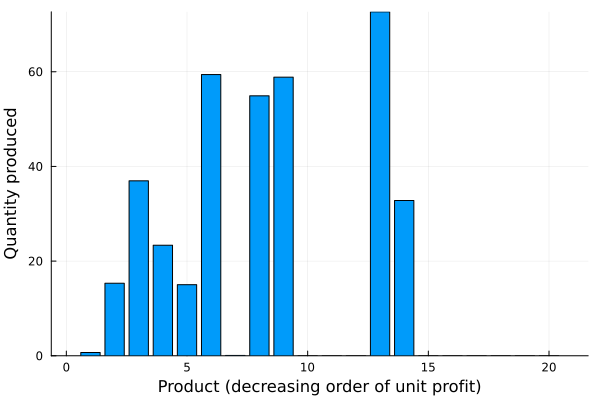

In [249]:
# Solution
solution = JuMP.value.(x) # Note the dot after "value"!
order_product = sortperm(-vec(p))
product_manufacturing_decisions_plot = Plots.bar(
    solution[order_product],
    legend = :false,
    xlabel = "Product (decreasing order of unit profit)",
    ylabel = "Quantity produced",
)
Plots.savefig(product_manufacturing_decisions_plot, "product_manufacturing_decisions_plot.png")
product_manufacturing_decisions_plot

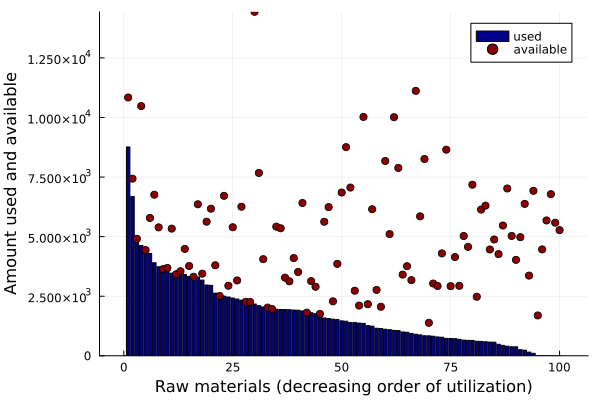

In [264]:
resource_vector = a * solution
order_resource = sortperm(-vec(resource_vector))
resource_utilization_decisions_plot = Plots.plot(
    xlabel = "Raw materials (decreasing order of utilization)",
    ylabel = "Amount used and available",
)
Plots.bar!(
    resource_vector[order_resource],
    label = "used",
    color = :darkblue,
)
Plots.scatter!(
    b[order_resource],
    label = "available",
    color = :darkred,
)
Plots.savefig(resource_utilization_decisions_plot, "resource_utilization_decisions_plot.png")
resource_utilization_decisions_plot

### Exercise: Model reformulation

Re-formulate the following model as a linear program and solve it computationally. Report the objective value and the optimal solution:
\begin{align*}
    \min \quad 
    & c^\top x + | d^\top x |
    \\
    \text{s.t.} \quad 
    & A x \geq b
    \\
    & x \geq 0
\end{align*}

In [18]:
# Generate problem data
using Random
Random.seed!(2024)
# 3 constraints, 5 variables
n = 5
m = 3
c = Int.(ceil.(rand(Float64, (n,)) * 10))
A = Int.(ceil.(rand(Float64, (m, n)) * 3))
b = Int.(ceil.(rand(Float64, (m,)) * 3 * n))
d = [4, 2, -5, 1, -3]
;

In [17]:
### Insert model code here


In [16]:
### Insert solution reporting code here
println("Objective value:  _____")
println("Optimal solution: x = _____")

Objective value:  _____
Optimal solution: x = _____


## Helpful links: Julia, JuMP and Gurobi

We've barely scratched the surface of Julia, JuMP, and Gurobi. Here are some helpful links for your reference:
- Julia [documentation](https://docs.julialang.org/en/v1/) (it's excellent!)
- A [list](https://docs.julialang.org/en/v1/manual/noteworthy-differences/) of differences between Julia and other languages
- Packages to know in Julia:
    - [`DataFrames.jl`](https://dataframes.juliadata.org/stable/) for working with dataframes
    - [`Plots.jl`](https://docs.juliaplots.org/latest/) for plotting (among a few options)
- A step-by-step [guide](https://jump.dev/JuMP.jl/stable/tutorials/getting_started/getting_started_with_JuMP/) to using JuMP
- the JuMP manual ([models](https://jump.dev/JuMP.jl/stable/manual/models/), [variables](https://jump.dev/JuMP.jl/stable/manual/variables/) and [constraints](https://jump.dev/JuMP.jl/stable/manual/constraints/) in particular)
- in the Gurobi documentation, [guidelines](https://www.gurobi.com/documentation/11.0/refman/mip_models.html) for parameter settings for MIP models (come back to this later)